### Importing necessary libraries and packages

In [1]:
from sklearn.model_selection import train_test_split # splitting the dataset
from sklearn.preprocessing import PolynomialFeatures # regression algorithm
from sklearn.linear_model import LinearRegression # regression algorithm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error # accuracy metric
import numpy as np # data processing
import pandas as pd # data processing 
import matplotlib.pyplot as plt # data plotting

In [2]:
df = pd.read_csv("Dataset/Position_Salaries.csv")
df.head()

,Level,Salary
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000


In [3]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,24950.000000
std,3.02765,29937.388367
min,1.00000,4500.000000
25%,3.25000,6500.000000
50%,5.50000,13000.000000
75%,7.75000,27500.000000
max,10.00000,100000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [5]:
df.columns

Index(['Level', 'Salary'], dtype='object')

In [6]:
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Text(0, 0.5, 'Salary')

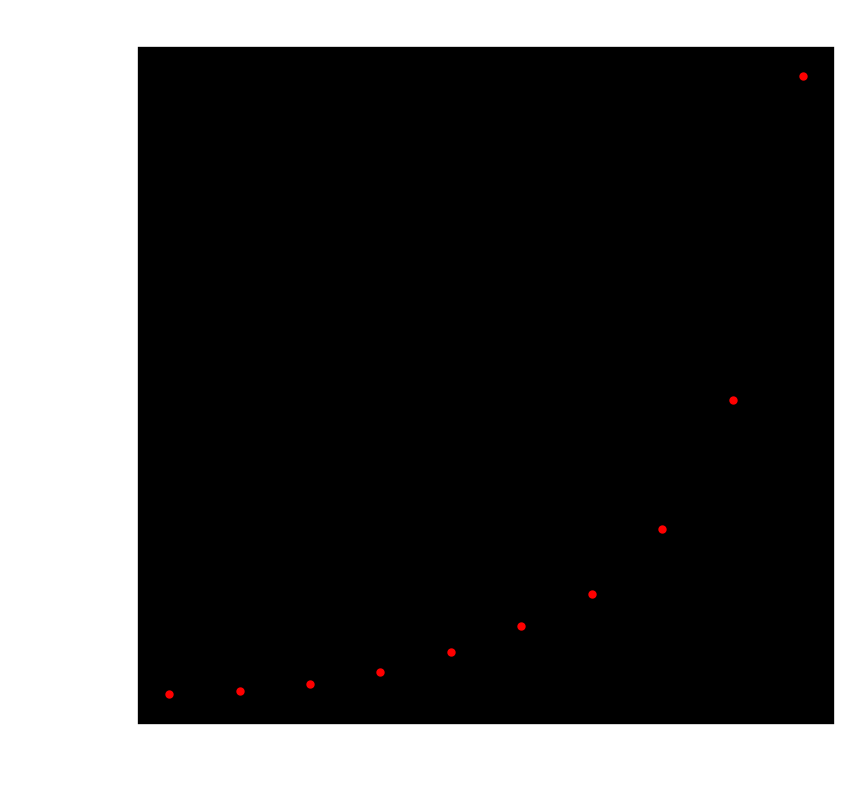

In [8]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Level = df['Level']
Salary = df['Salary']
plt.scatter(Level, Salary, marker=".", color="red")
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(4000,114000,10000))
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
#plt.savefig("Images/Years_Experience_vs_Salary.png",bbox_inches='tight')

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
poly_reg = PolynomialFeatures(degree=4)
x_poly= poly_reg.fit_transform(X)
lin_reg= LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression()

In [11]:
rmse=[]
for i in range(1, 11):
    poly_reg = PolynomialFeatures(degree=i)
    x_poly= poly_reg.fit_transform(X)
    lin_reg= LinearRegression()
    lin_reg.fit(x_poly, y)
    y_pred= lin_reg.predict(x_poly)
    rmse.append(np.sqrt(mean_squared_error(y, y_pred)))

Minimum error:- 7.505667285286585e-05 at K = 10


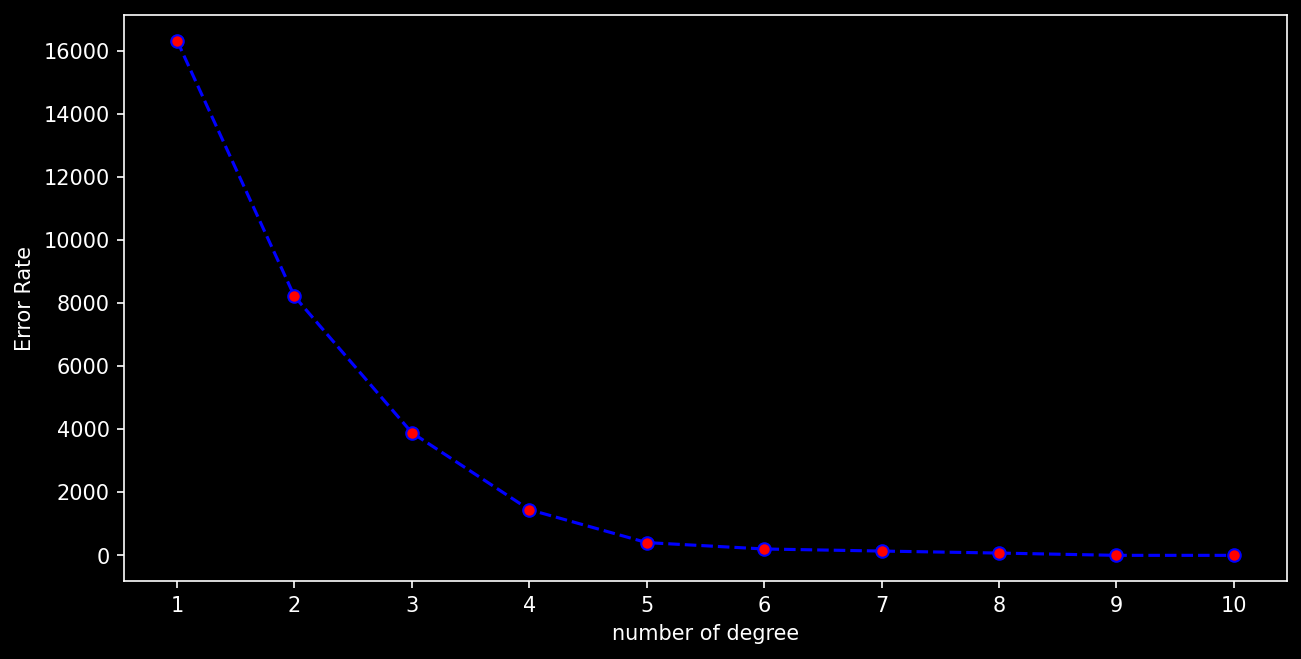

In [12]:
plt.figure(figsize=(10,5),dpi=150)
plt.plot(range(1,11),rmse,linestyle='dashed',color='blue',marker='o',markerfacecolor='red')
plt.xlabel('number of degree')
plt.ylabel('Error Rate')
plt.xticks(range(1,11))
print("Minimum error:-",min(rmse),"at K =",1+rmse.index(min(rmse)))

Text(0, 0.5, 'Salary')

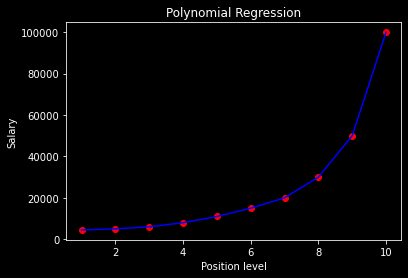

In [13]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')


In [14]:
print(mean_absolute_error(y, lin_reg.predict(poly_reg.fit_transform(X))))

4.438332762219943e-05
